In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/My Drive/Insight/Project/fashionbeans

/content/drive/My Drive/Insight/Project/fashionbeans


In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

In [13]:
mf_features=pd.read_csv('file_name.csv',header=None)
mf_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51160,51161,51162,51163,51164,51165,51166,51167,51168,51169,51170,51171,51172,51173,51174,51175,51176,51177,51178,51179,51180,51181,51182,51183,51184,51185,51186,51187,51188,51189,51190,51191,51192,51193,51194,51195,51196,51197,51198,51199
0,0.609517,0.000000,1.269442,0.077757,0.167479,0.000000,0.0,0.000000,0.261193,0.000000,0.000000,0.0,0.000000,0.0,0.226551,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.095455,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,1.365980,2.622738,0.000000,0.970487,0.221218,0.000000,0.000000,1.487927,0.412673,0.297063,2.163700,0.193887,1.006682,0.206187,0.000000,1.915681,2.168373,0.000000,0.000000,0.600447,1.147875,1.244060,0.598787,0.000000,1.150549,0.287109,0.000000,0.000000,0.246010,0.000000,2.136493,0.000000,1.265627,1.843800,0.070631,2.007093,0.000000,1.354830,0.000000
1,0.113364,0.988888,1.437143,0.306887,0.000000,0.000000,0.0,0.000000,0.509535,0.000000,0.000000,0.0,0.000000,0.0,0.327697,0.016594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225677,0.000000,0.0,0.0,0.0,0.0,0.761490,0.000000,0.0,0.000000,0.300620,0.0,0.0,0.189704,0.0,0.000000,0.000000,...,0.368110,0.000000,0.000000,0.998615,1.146653,0.752574,0.490626,0.000000,1.060020,0.575807,0.000000,2.757664,0.122705,0.024116,0.000000,0.053810,0.458500,0.595239,0.000000,1.510947,0.425714,1.072771,1.286196,0.110936,0.260611,0.000000,0.000000,0.398126,0.329830,0.000000,0.516240,0.364343,0.000000,1.072381,0.800528,0.118505,2.516313,0.596274,0.000000,1.190934
2,0.000000,0.000000,1.056550,0.000000,0.000000,0.204264,0.0,0.000000,0.000000,0.000000,0.366217,0.0,0.954388,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.347193,0.000000,0.0,0.0,0.0,0.0,0.214349,0.000000,0.0,1.005458,0.000000,0.0,0.0,0.000000,0.0,0.233769,0.333528,...,0.689162,0.000000,0.258031,0.000000,0.307641,0.486789,0.727889,0.000000,0.270332,0.000000,0.000000,2.202444,0.532128,0.634514,0.000000,0.000000,0.000000,0.245286,0.000000,1.248825,0.275583,0.224946,0.581371,0.000000,1.038088,0.192466,0.000000,0.000000,0.000000,1.204150,0.000000,0.176565,0.000000,1.762239,0.903021,0.691466,0.468348,0.880923,0.080072,0.000000
3,0.577228,0.000000,0.695660,0.000000,0.940844,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.542150,0.279002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.127292,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.556478,...,0.062974,0.000000,0.000000,0.000000,0.367306,0.220510,0.000000,0.000000,0.000000,0.322086,0.000000,0.555509,0.840382,0.000000,0.000000,0.000000,0.000000,0.156922,0.000000,0.149924,0.147376,0.000000,0.038719,0.000000,0.000000,0.014217,0.000000,0.000000,0.382279,0.000000,0.000000,0.000000,0.000000,0.657401,0.000000,0.000000,0.300727,0.000000,0.000000,0.000000
4,0.313765,0.157664,1.610840,0.638146,0.000000,0.000000,0.0,0.000000,0.212229,0.000000,0.000000,0.0,0.000000,0.0,0.463872,0.339468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.439722,0.475029,0.0,0.000000,0.077574,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,1.284853,0.000000,1.468784,0.632947,0.000000,0.355827,0.000000,1.696824,0.925928,0.000000,0.787469,0.000000,0.458828,0.000000,0.000000,0.924660,1.454131,2.430017,2.722142,0.000000,1.276979,0.558504,0.000000,0.000000,0.000000,0.000000,0.000000,0.703876,0.000000,0.000000,1.212248,1.684119,0.000000,0.688588,0.556810,1.262850,1.337694,0.000000,2.666181,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.596400,0.000000,1.286246,0.096143,0.191501,0.000000,0.0,0.000000,0.201792,0.000000,0.000000,0.0,0.000000,0.0,0.268454,0.000000,0.0,0

In [16]:
### Silhouette Coefficient

mf_features_norm = preprocessing.normalize(mf_features)

kmeans = KMeans(n_clusters=2, random_state=0).fit(mf_features_norm)
labels = kmeans.labels_
metrics.silhouette_score(mf_features_norm, labels, metric='euclidean')

0.10050231685573169

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

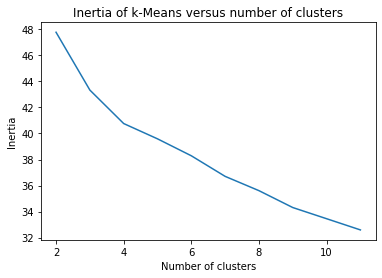

In [18]:
## Elbow

scores = [KMeans(n_clusters=i+2).fit(mf_features_norm).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [47]:
## PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mf_features_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,0.399274,0.245233
1,-0.144304,-0.092925
2,-0.344397,-0.028427
3,-0.443361,0.307007
4,0.113359,-0.312680
...,...,...
77,0.418765,0.280606
78,0.013762,-0.273948
79,-0.378662,-0.075987
80,0.432025,0.094019


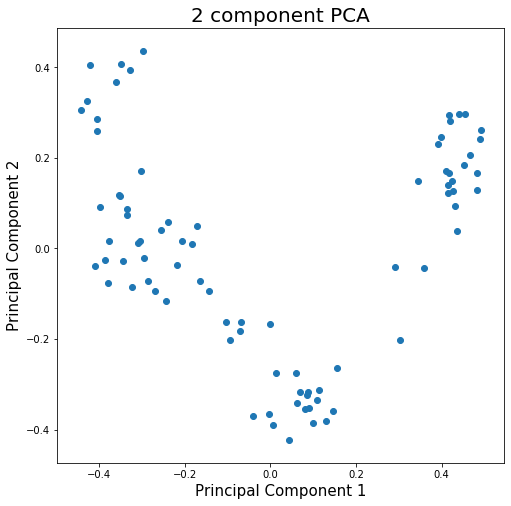

In [48]:
## 2D scatter 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
               )


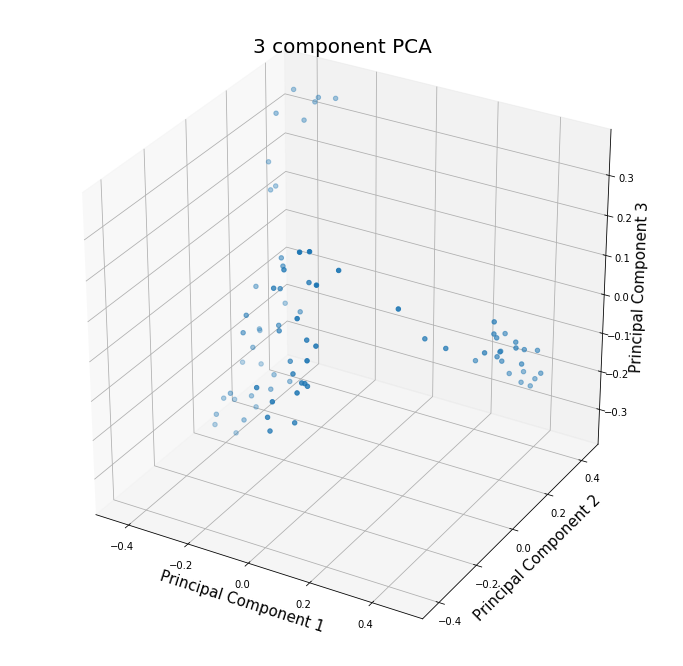

In [42]:
## 3D scatter 

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1'], 
           principalDf['principal component 2'],
           principalDf['principal component 3']
          )